In [2]:
# read image from './COVID-19_Radiography_Dataset/Normal/images/Normal-1.png'

# import the necessary packages
import numpy as np
import argparse
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import pandas as pd
import seaborn as sns

In [3]:
# functions for image processing
# add contrast to the image 
def contrast(img, alpha, beta):
    new_img = np.zeros(img.shape, img.dtype)
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            for c in range(img.shape[2]):
                new_img[y,x,c] = np.clip(alpha*img[y,x,c] + beta, 0, 255)
    return new_img

# add brightness to the image
def brightness(img, alpha, beta):
    new_img = np.zeros(img.shape, img.dtype)
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            for c in range(img.shape[2]):
                new_img[y,x,c] = np.clip(alpha*img[y,x,c] + beta, 0, 255)
    return new_img

# add gamma to the image
def gamma(img, gamma):
    gamma_table = [np.power(x/255.0, gamma)*255.0 for x in range(256)]
    gamma_table = np.round(np.array(gamma_table)).astype(np.uint8)
    return cv2.LUT(img, gamma_table)

# add blur to the image
def blur(img, ksize):
    return cv2.blur(img, (ksize, ksize))

# add sharpen to the image
def sharpen(img, ksize):
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    return cv2.filter2D(img, -1, kernel)

# add emboss to the image
def emboss(img, ksize):
    kernel = np.array([[-2,-1,0], [-1,1,1], [0,1,2]])
    return cv2.filter2D(img, -1, kernel)

# add edge detection to the image
def edge_detection(img, ksize):
    kernel = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])
    return cv2.filter2D(img, -1, kernel)

In [4]:

covid_images_length = len(os.listdir('./COVID-19_Radiography_Dataset/COVID/sharpen_images/'))
normal_images_length = len(os.listdir('./COVID-19_Radiography_Dataset/Normal/sharpen_images/'))
viral_pneumonia_images_length = len(os.listdir('./COVID-19_Radiography_Dataset/Viral Pneumonia/sharpen_images/'))

covid_images = []
for i in range(1,covid_images_length+1):
    covid_images.append(cv2.imread('./COVID-19_Radiography_Dataset/COVID/sharpen_images/COVID-'+str(i)+'.png'))

# read all images of normal
normal_images = []
for i in range(1,normal_images_length+1):
    normal_images.append(cv2.imread('./COVID-19_Radiography_Dataset/Normal/sharpen_images/Normal-'+str(i)+'.png'))

# read all images of viral pneumonia
viral_pneumonia_images = []
for i in range(1,viral_pneumonia_images_length+1):
    viral_pneumonia_images.append(cv2.imread('./COVID-19_Radiography_Dataset/Viral Pneumonia/sharpen_images/Viral Pneumonia-'+str(i)+'.png'))


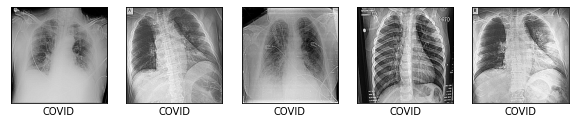

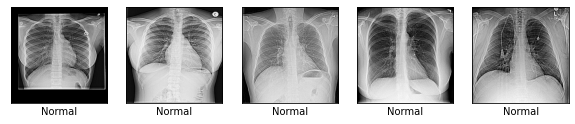

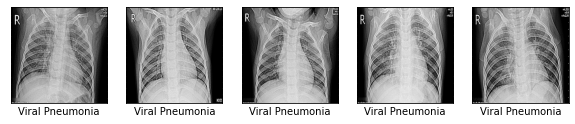

In [5]:
# display 5 images of all 3 classes
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(covid_images[i], cmap=plt.cm.binary)
    plt.xlabel('COVID')
plt.show()

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(normal_images[i], cmap=plt.cm.binary)
    plt.xlabel('Normal')
plt.show()

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(viral_pneumonia_images[i], cmap=plt.cm.binary)
    plt.xlabel('Viral Pneumonia')
plt.show()

In [6]:
# function to return a vector of frequency of all intensities from 0 to 255

def get_img_vector(img):
    img_vector = np.zeros(256)
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            img_vector[img[i][j]] += 1
    return img_vector


# function to calculate euclidean distance between two vectors
def euclidean_distance(vector1, vector2):
    return np.sqrt(np.sum(np.square(vector1 - vector2)))

# function to calculate manhattan distance between two vectors
def manhattan_distance(vector1, vector2):
    return np.sum(np.abs(vector1 - vector2))

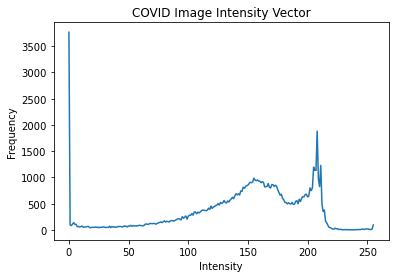

[3.766e+03 9.400e+01 8.300e+01 1.090e+02 1.400e+02 1.050e+02 1.070e+02
 6.100e+01 6.800e+01 5.500e+01 6.300e+01 7.400e+01 5.000e+01 5.700e+01
 5.500e+01 6.100e+01 6.900e+01 5.300e+01 4.000e+01 5.000e+01 5.100e+01
 4.600e+01 5.500e+01 4.900e+01 5.400e+01 4.200e+01 4.900e+01 5.000e+01
 5.100e+01 5.900e+01 4.800e+01 4.800e+01 4.800e+01 4.800e+01 7.100e+01
 4.400e+01 6.500e+01 5.200e+01 6.100e+01 5.300e+01 5.100e+01 6.400e+01
 6.400e+01 6.700e+01 6.200e+01 5.500e+01 7.500e+01 6.800e+01 7.300e+01
 5.700e+01 7.600e+01 7.300e+01 8.700e+01 7.000e+01 8.300e+01 7.500e+01
 7.700e+01 7.600e+01 8.100e+01 8.900e+01 8.200e+01 8.400e+01 7.700e+01
 8.800e+01 1.090e+02 1.140e+02 1.040e+02 1.120e+02 1.240e+02 1.220e+02
 1.180e+02 1.260e+02 1.180e+02 1.100e+02 1.260e+02 1.330e+02 1.420e+02
 1.530e+02 1.390e+02 1.530e+02 1.740e+02 1.500e+02 1.650e+02 1.580e+02
 1.500e+02 1.770e+02 1.750e+02 1.770e+02 1.680e+02 1.810e+02 1.920e+02
 2.090e+02 2.140e+02 2.040e+02 1.910e+02 2.540e+02 2.220e+02 2.450e+02
 2.660

In [7]:
img = covid_images[0]
img_vector = get_img_vector(img)
plt.plot(img_vector)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('COVID Image Intensity Vector')
plt.show()

print(img_vector)

In [8]:
# get the intensity vector of all covid images
covid_images_vector = []
for i in range(0, len(covid_images)):
    covid_images_vector.append(get_img_vector(covid_images[i]))


KeyboardInterrupt: 

In [15]:
# save the covid_images_vector to a file
with open('./COVID-19_Radiography_Dataset/COVID/covid_images_vector.txt', 'w') as f:
    f.write(str(covid_images_vector))

In [18]:
# get the intensity vector of all normal images

normal_images_vector = []
for i in range(0, len(normal_images)):
    normal_images_vector.append(get_img_vector(normal_images[i]))

# save the normal_images_vector to a file
with open('./COVID-19_Radiography_Dataset/Normal/normal_images_vector.txt', 'w') as f:
    f.write(str(normal_images_vector))

In [ ]:
# get the intensity vector of all viral pneumonia images

viral_pneumonia_images_vector = []
for i in range(0, len(viral_pneumonia_images)):
    viral_pneumonia_images_vector.append(
        get_img_vector(viral_pneumonia_images[i]))

# # save the viral_pneumonia_images_vector to a file
# with open('./COVID-19_Radiography_Dataset/Viral Pneumonia/viral_pneumonia_images_vector.txt', 'w') as f:
#     f.write(str(viral_pneumonia_images_vector))
